<a href="https://colab.research.google.com/github/knc6/jarvis-tools-notebooks/blob/master/jarvis-tools-notebooks/AIMS2022_Python_Basics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Python Basics for Machine Learning

# Table of Contents
1. Installing packages (matminer to load JARVIS 3D dataset)
2. Data manipulation with ``pandas`` package 
3. K-means clustering using ``sci-kit learn``
4. PCA dimensionality reduction using ``sci-kit learn``
5. Plotting results using ``matplotlib``

# Python Basics
Python is a highly modular language, which makes the use of external libraries to perform certian operations. We'll first go over the very basics of the pandas and plotly libraries, which will, respectively, be used for data-handling and plotting in the following example.

## Data-handling with Pandas
Pandas is a Python package that defines the DataFrame object. DataFrames are ideal for reading, writing, storing, and manipulating information in a tabular format (i.e. information labelled by a row index and a column heading).


First, we'll fetch the JARVIS-DFT 3D Database, which contains the relaxed structures and DFT properties for about 55,000 compounds using the ``matminer`` Python package. First, we need to install the matminer package using the command below. NOTE: the leading exclamation point (!) indicates that the command should be run as a shell command rather than a Python command.

Uncomment the necessary lines below if your environment is missing any of [matminer](https://hackingmaterials.lbl.gov/matminer/), jarvis-tools or  Scikit-learn.

In [1]:
# !pip install matminer
# !pip install -U jarvis-tools
# !pip install -U scikit-learn

In [17]:
import json
import zipfile

import requests
from matminer.datasets.convenience_loaders import load_jarvis_dft_3d

# from jarvis.db.figshare import data
from jarvis.core.atoms import Atoms
from sklearn.cluster import KMeans
from sklearn import preprocessing as pp
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

In [3]:
# NBVAL_IGNORE_OUTPUT

dft3d_df = load_jarvis_dft_3d(data_home=".")

Properties associated with each entry in the JARVIS-DFT 3D materials database.

In [4]:
print(dft3d_df.columns)

Index(['epsilon_x opt', 'epsilon_y opt', 'epsilon_z opt', 'structure',
       'e_form', 'shear modulus', 'structure initial', 'jid', 'bulk modulus',
       'gap tbmbj', 'epsilon_x tbmbj', 'epsilon_y tbmbj', 'epsilon_z tbmbj',
       'mpid', 'gap opt', 'composition'],
      dtype='object')


The `dropna` method drops the rows that contain any NaN (not a number) values.

In [5]:
dft3d_df = dft3d_df.dropna()

# Fetch the first 50 rows
dft3d_50 = dft3d_df.head(50)

dft3d_50[:10]

,epsilon_x opt,epsilon_y opt,epsilon_z opt,structure,e_form,shear modulus,structure initial,jid,bulk modulus,gap tbmbj,epsilon_x tbmbj,epsilon_y tbmbj,epsilon_z tbmbj,mpid,gap opt,composition
75,21.0673,29.1228,17.6066,"[[3.1506963 4.30596127 3.56982179] As, [0.384...",0.025,19.993,"[[3.17888147 4.36479751 3.69558323] As, [0.381...",JVASP-11997,34.556,0.6495,15.0619,14.9875,12.4788,mp-158,0.0221,(As)
80,13.8023,38.1854,35.5515,"[[0.37213617 3.67987527 0.87369073] H, [1.4889...",-1.184,25.667,"[[0.34436223 3.69323659 0.87470146] H, [1.4990...",JVASP-12002,78.478,0.0083,16.5818,61.5222,53.1874,mp-24242,0.0038,"(H, O, F, Cu)"
83,6.3933,6.9466,6.3796,"[[ 0.92796672 1.82915421 10.16747299] O, [2.7...",-2.086,52.420,"[[ 0.938753 1.84002706 10.93783201] O, [2.8...",JVASP-12010,75.067,2.4642,5.2402,5.8492,5.3897,mp-510584,1.9202,"(O, Mo)"
92,6.0838,6.0838,6.5652,"[[0. 0. 0.] Ag, [2.22040369 2.22040369 0. ...",-0.204,5.947,"[[0. 0. 0.] Ag, [2.2945515 2.2945515 0. ...",JVASP-12023,17.478,2.7025,4.5320,4.5323,4.9101,mp-567809,1.2599,"(Ag, I)"
95,7.0316,6.3127,5.2274,"[[0. 2.06587432 0.88869064] Zr, [1.814...",-1.768,37.120,"[[0. 2.085838 0.88566666] Zr, [1.819...",JVASP-12027,54.633,2.2441,6.0366,5.5260,4.6886,mp-570157,1.8723,"(Zr, Br, N)"
96,4.6738,4.7460,4.7722,"[[1.41349448 4.71501305 5.06256213] In, [0.289...",-0.830,9.047,"[[8.49448596 4.73948454 6.27818672] In, [0.290...",JVASP-12028,16.378,3.7113,3.6685,3.7637,3.7977,mp-570219,2.3104,"(In, Br)"
99,5.0636,5.0798,4.9797,"[[1.50785766 1.02477434 2.93571664] Y, [ 7.555...",-1.473,7.687,"[[1.646224 1.11881123 3.20510836] Y, [ 8.247...",JVASP-12033,12.578,2.8863,5.5443,5.5399,5.5646,mp-571442,2.6760,"(Y, I)"
103,2.8447,2.9459,2.7976,"[[1.17206677 8.41802227 0.93781225] Al, [0.259...",-2.430,73.973,"[[0.2515101 8.52548747 0.940367 ] Al, [0.057...",JVASP-12038,110.656,6.9515,2.4188,2.4769,2.3750,mp-625055,5.1686,"(Al, H, O)"
108,4.9033,5.1118,5.1243,"[[ 2.54192839 -1.33085318 -0.81347227] Bi, [4....",-1.969,38.960,"[[ 2.58162693 -1.32106185 -0.80748743] Bi, [4....",JVASP-12051,96.300,4.4734,3.6415,3.7771,3.7842,mp-759883,2.9829,"(Bi, O, F)"
115,16.9750,14.0779,15.5189,"[[-1.3982931 -1.34418681 -3.44903549] Cu, [ 0...",-0.716,43.800,"[[-1.3943665 -1.40808459 -3.46870699] Cu, [ 0...",JVASP-12059,80.133,0.0117,17.6582,21.6400,18.3388,mp-996956,0.0087,"(Cu, H, O)"


Here, we print out all the compositions in our select dataset of 50 materials.

Following function is required due to some issues in Jarvis with downloading data.

In [6]:
def read_data():
    """Temporary download data function due to
    https://github.com/usnistgov/jarvis/issues/251
    """

    json_tag = "jdft_3d-8-18-2021.json"
    url = "https://ndownloader.figshare.com/files/29204826"
    tmpfile = "tmp.zip"

    response = requests.get(url)
    with open(tmpfile, "wb") as f:
        for block in response.iter_content(1024):
            f.write(block)
    return json.loads(zipfile.ZipFile(tmpfile).read(json_tag))

In [7]:
dft_3d = read_data()

comp_list = []
for indx, d in dft3d_50.iterrows():
    entry = next(j for j in dft_3d if j["jid"] == d["jid"])
    comp = Atoms.from_dict(entry["atoms"]).composition.reduced_formula
    comp_list.append(comp)

print(comp_list)

['As', 'CuHOF', 'MoO3', 'AgI', 'ZrBrN', 'InBr3', 'YI3', 'AlHO2', 'BiOF', 'CuHO2', 'TiClO', 'VCuO4', 'ScBrO', 'ZnCu3H6Cl2O6', 'VOF3', 'ZnCl2', 'ScHO2', 'ZrMo2O8', 'BaCaI4', 'CaPbI4', 'YBr3', 'NdIO', 'Li2WS4', 'SnO2', 'SnO2', 'CoF2', 'GaS', 'RbPS3', 'BeF2', 'BeO', 'CO2', 'CaCl2', 'SrClF', 'SrBrF', 'SrCl2', 'CaCl2', 'CaClF', 'NaHF2', 'Bi2SO2', 'BrF5', 'IF7', 'AsF3', 'KSc2F7', 'CClF3', 'K2MgF4', 'LiMgP', 'H4BrN', 'NaHS', 'SrAl2Te4', 'AgAsF6']


Here, we filter out the feature vector to only include single scalar-values properties.

In [8]:
# Form feature vector from the scalar properties in the dataframe
scalar_cols = [
    col
    for col in dft3d_50.columns
    if col not in ["structure", "structure initial", "jid", "mpid", "composition"]
]

feature_vect = dft3d_50[scalar_cols].to_numpy()

feature_vect[:10]

array([[ 2.10673e+01,  2.91228e+01,  1.76066e+01,  2.50000e-02,
         1.99930e+01,  3.45560e+01,  6.49500e-01,  1.50619e+01,
         1.49875e+01,  1.24788e+01,  2.21000e-02],
       [ 1.38023e+01,  3.81854e+01,  3.55515e+01, -1.18400e+00,
         2.56670e+01,  7.84780e+01,  8.30000e-03,  1.65818e+01,
         6.15222e+01,  5.31874e+01,  3.80000e-03],
       [ 6.39330e+00,  6.94660e+00,  6.37960e+00, -2.08600e+00,
         5.24200e+01,  7.50670e+01,  2.46420e+00,  5.24020e+00,
         5.84920e+00,  5.38970e+00,  1.92020e+00],
       [ 6.08380e+00,  6.08380e+00,  6.56520e+00, -2.04000e-01,
         5.94700e+00,  1.74780e+01,  2.70250e+00,  4.53200e+00,
         4.53230e+00,  4.91010e+00,  1.25990e+00],
       [ 7.03160e+00,  6.31270e+00,  5.22740e+00, -1.76800e+00,
         3.71200e+01,  5.46330e+01,  2.24410e+00,  6.03660e+00,
         5.52600e+00,  4.68860e+00,  1.87230e+00],
       [ 4.67380e+00,  4.74600e+00,  4.77220e+00, -8.30000e-01,
         9.04700e+00,  1.63780e+01,  3.71

## Machine Learning Models Implemented in Sci-kit Learn

``sci-kit learn`` is a Python package that faciliates the implementation of several machine learning models for dimensionality reduction, clustering, classification, regression, and more.

Before performing K-means clustering, the data is pre-processed such that each feature has a mean centered at zero and a standard deviation of 1.

**Try modifying**

Run the K--means clustering on the un-scaled feature vector ``feature_vect`` instead to see what happens

The following scales the feature vector as a pre-processing step such that features have zero mean and
unit variance.

In [9]:
scaler = pp.StandardScaler().fit(feature_vect)

feat_vec_scale = scaler.transform(feature_vect)

print("mean: ", feat_vec_scale.mean(axis=0))
print("std. deviation: ", feat_vec_scale.std(axis=0))

mean:  [-1.33226763e-17  5.44009282e-17  1.47659662e-16  7.75768338e-17
  2.04281037e-16  3.33066907e-18  1.84297022e-16 -2.77555756e-17
 -5.10702591e-17 -3.88578059e-17  1.53210777e-16]
std. deviation:  [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


Run the K-means clustering and output the cluster labels for each sample in the dataset.

**Try modifiying**

Change the number of cluster! ``K``

In [10]:
# NBVAL_IGNORE_OUTPUT
# Stochastic output

# Fit K-means model

K = 5
# CHANGE the number of clusters generated
kmeans = KMeans(n_clusters=K).fit(
    feat_vec_scale
)  # CHANGE to the unscaled/un-whitened feature_vect to see what happens!
lbl = kmeans.labels_
centers = kmeans.cluster_centers_
y_kmeans = kmeans.predict(feat_vec_scale)
print(y_kmeans)

[3 3 1 1 1 1 1 0 1 3 3 3 0 3 1 1 0 1 1 1 1 0 1 1 1 2 1 1 0 4 0 0 0 0 0 0 0
 0 1 1 1 0 0 0 0 1 1 1 1 1]


In [14]:
# NBVAL_IGNORE_OUTPUT
# Stochastic ouput

# Print contents of each cluster

for k in range(K):  # For each generated cluster
    pos = [
        n for (n, m) in enumerate(lbl) if m == k
    ]  # Get the indices in the labels vector which point ot that cluster
    compGrp = np.array(comp_list)[pos]
    print(f"Generated Compound Cluster #{k + 1}")
    print(compGrp)
    print("mean feature values of the cluster:")
    print([{f: m} for f, m in zip(scalar_cols, centers[k])])
    print("\n")

Generated Compound Cluster #1
['AlHO2' 'ScBrO' 'ScHO2' 'NdIO' 'BeF2' 'CO2' 'CaCl2' 'SrClF' 'SrBrF'
 'SrCl2' 'CaCl2' 'CaClF' 'NaHF2' 'AsF3' 'KSc2F7' 'CClF3' 'K2MgF4']
mean feature values of the cluster:
[{'epsilon_x opt': -0.49856046466816817}, {'epsilon_y opt': -0.44987579963068974}, {'epsilon_z opt': -0.40449841660578467}, {'e_form': -0.9600209024705456}, {'shear modulus': -0.0472778785120525}, {'bulk modulus': -0.06203775122462261}, {'gap tbmbj': 1.028887385213975}, {'epsilon_x tbmbj': -0.4384430194885642}, {'epsilon_y tbmbj': -0.35688308637197885}, {'epsilon_z tbmbj': -0.29937843629234284}, {'gap opt': 1.0672560059995477}]


Generated Compound Cluster #2
['MoO3' 'AgI' 'ZrBrN' 'InBr3' 'YI3' 'BiOF' 'VOF3' 'ZnCl2' 'ZrMo2O8'
 'BaCaI4' 'CaPbI4' 'YBr3' 'Li2WS4' 'SnO2' 'SnO2' 'GaS' 'RbPS3' 'Bi2SO2'
 'BrF5' 'IF7' 'LiMgP' 'H4BrN' 'NaHS' 'SrAl2Te4' 'AgAsF6']
mean feature values of the cluster:
[{'epsilon_x opt': -0.21682222679516291}, {'epsilon_y opt': -0.23587457661443534}, {'epsilon_z opt':

Here, we will use principal component analysis (PCA) primarily as a way to visualize our "high-dimensional" data (11 total features) in two dimensions. 

**Try modifying**

Perform the PCA on the feeature vector first and then apply the K-means clustering algorithm to the principal component vectors.

PCA(n_components=2)


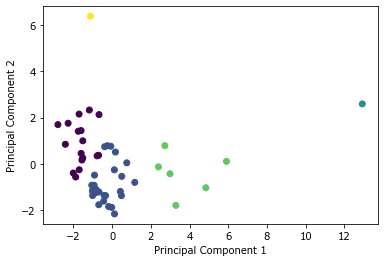

In [12]:
# Plot samples against first two principal components, colored by their cluster

pca = PCA(n_components=2)
pca.fit(feat_vec_scale)
print(pca)
comp_dim = pca.transform(feat_vec_scale)
plt.figure()
plt.scatter(comp_dim[:, 0], comp_dim[:, 1], c=y_kmeans)
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.show()

The principal components are linear combinations of the original features. Here, we plot out how each principal component weights the original features. 

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
 [Text(0.0, 0, '0.0'),
  Text(0.2, 0, '0.2'),
  Text(0.4, 0, '0.4'),
  Text(0.6000000000000001, 0, '0.6'),
  Text(0.8, 0, '0.8'),
  Text(1.0, 0, '1.0'),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

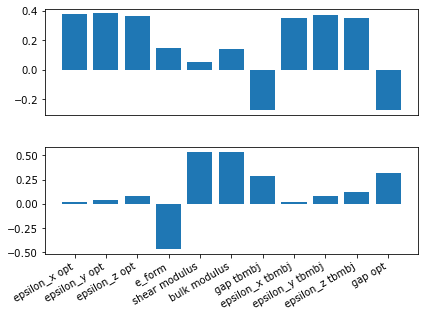

In [13]:
# Show the weights of different features in the first two principal components

pca_weights = pca.components_
fig, (ax1, ax2) = plt.subplots(2, 1)
fig.tight_layout()
ax1.bar(scalar_cols, pca_weights[0])
ax1.set_xticks([])
ax2.bar(scalar_cols, pca_weights[1])
plt.xticks(rotation=30, ha="right")